In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

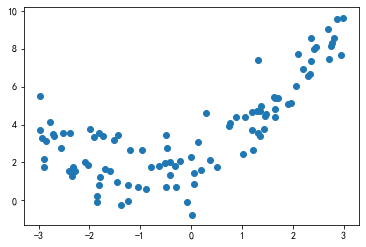

In [12]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 留出法分割数据集
X_train.shape

(80, 1)

In [14]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    """绘制学习曲线"""
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.xlim([0, len(X_train)+1])
    plt.ylim(0, 4)
    plt.ylabel('loss')
    plt.xlabel('Training examples')
    plt.show()
    

# 管道机制    
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    

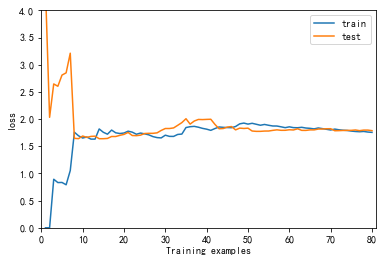

In [15]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test) # 欠拟合

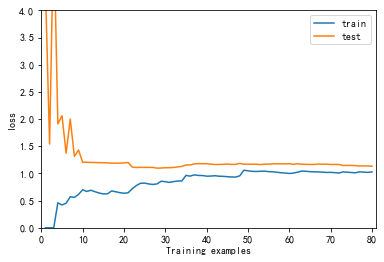

In [16]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test) # 泛化性能较好

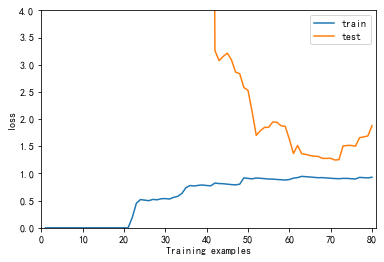

In [47]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test) # 过拟合